In [86]:
import numpy as np
rng = np.random.default_rng()

import pandas as pd

In [577]:
def unbiased_mutation(N, mu, p_0, t_max, r_max):
    # Create an output DataFrame
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })

    for r in range(r_max):
        # Create first generation
        population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1 - p_0])})

        # Add first generation's p for run r
        output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N

        # For each generation 
        for t in range(1,t_max):
            # Copy individuals to previous_population DataFrame
            previous_population = population.copy()
            
            # Determine "mutant" individuals
            mutate = rng.choice([True, False], size=N, p=[mu, 1-mu], replace=True)

            # TODO: Something is off here! Changing the order of the conditions affects
            # the result. Should be constant with random noise but converges to either A or B

            # If there are "mutants" from A to B 
            conditionA = mutate & (previous_population["trait"] == "A")
            if conditionA.sum() > 0:
                population.loc[conditionA, "trait"] = "B"

            # If there are "mutants" from B to A
            conditionB = mutate & (previous_population["trait"] == "B")
            if conditionB.sum() > 0:
                population.loc[conditionB, "trait"] = "A"

            # Get p and put it into output slot for this generation t and run r
            output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    return output 

In [578]:
def plot_multiple_runs(data_model):
    groups = data_model.groupby("run")
    for _, g in groups:
        g.index = g["generation"]
        g["p"].plot(lw=.5, ylim=(0,1))

    data_model.groupby("generation")["p"].mean().plot(c="k", lw="1")

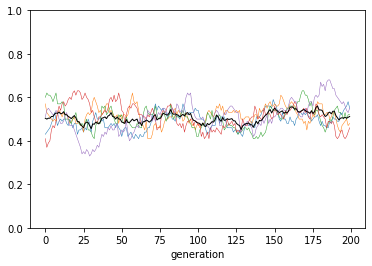

In [579]:
data_model = unbiased_mutation(N=100, mu=.05, p_0=0.5, t_max=200, r_max=5)
plot_multiple_runs(data_model)

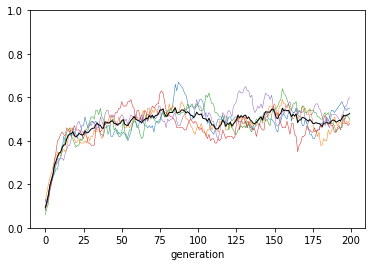

In [580]:
data_model = unbiased_mutation(N=100, mu=.05, p_0=0.1, t_max=200, r_max=5)
plot_multiple_runs(data_model)

In [581]:
def biased_mutation(N, mu_b, p_0, t_max, r_max):
    # Create the output DataFrame
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })

    for r in range(r_max):
        # Create first generation
        population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1 - p_0])})

        # Add first generation's p for run r
        output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N

        # For each generation 
        for t in range(1,t_max):
            # Copy individuals to previous_population DataFrame
            previous_population = population.copy()
            
            # Determine "mutant" individuals
            mutate = rng.choice([True, False], size=N, p=[mu_b, 1-mu_b], replace=True)

            # TODO: Something is off here! Changing the order of the conditions affects
            # the result. Should be constant with random noise but converges to either A or B

            # If there are "mutants" from B to A
            conditionB = mutate & (previous_population["trait"] == "B")
            if conditionB.sum() > 0:
                population.loc[conditionB, "trait"] = "A"

            # Get p and put it into output slot for this generation t and run r
            output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    return output 
        

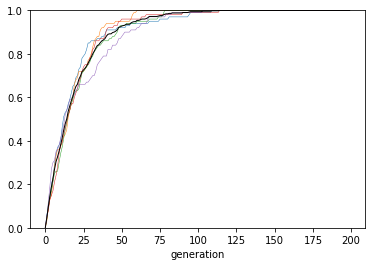

In [582]:
data_model = biased_mutation(N = 100, mu_b = 0.05, p_0 = 0, t_max = 200, r_max = 5)
plot_multiple_runs(data_model)

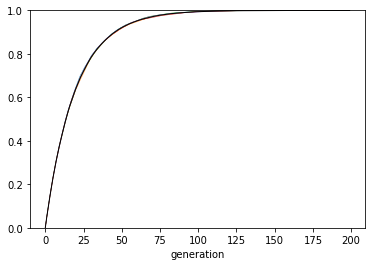

In [583]:
data_model = biased_mutation(N = 10000, mu_b = 0.05, p_0 = 0, t_max = 200, r_max = 5)
plot_multiple_runs(data_model)

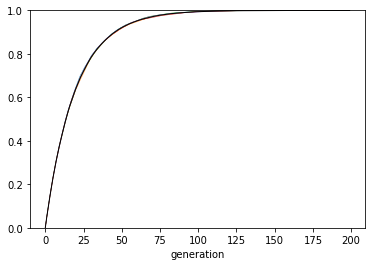

In [584]:
data_model <- biased_mutation(N = 10000, mu_b = 0.1, p_0 = 0, t_max = 200, r_max = 5)
plot_multiple_runs(data_model)